In [388]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches


In [188]:
# List of file paths
file_paths = ["data/study_type_teller/test.csv", "data/study_type_teller/train.csv", "data/study_type_teller/val.csv"]  # Replace with actual file names

# Read and concatenate all files
df_list = [pd.read_csv(file) for file in file_paths]
df_combined = pd.concat(df_list, ignore_index=True)[['pmid','journal_name','title','abstract']]  # Append all into one DataFrame
df_combined.insert(1, 'year', df_combined['pmid'].astype(str).str[:4])  # Assuming first 4 digits represent year
df_combined['doi']='doi_dummy'

In [190]:
df_combined.head()

,pmid,year,journal_name,title,abstract,doi
0,12047012,1204,Schizophrenia bulletin,Can clinical practice guide a research agenda?,Articles from this issue of the Bulletin indic...,doi_dummy
1,28832188,2883,Future medicinal chemistry,Dual/multitargeted xanthone derivatives for Al...,"To date, the current therapy for Alzheimer's d...",doi_dummy
2,17678496,1767,Expert review of neurotherapeutics,Benefits of occupational therapy in stroke reh...,Stroke is the largest single cause of severe p...,doi_dummy
3,25649308,2564,Annals of the New York Academy of Sciences,The promise of ketamine for treatment-resistan...,Major depressive disorder (MDD) is one of the ...,doi_dummy
4,6312596,6312,La semaine des hopitaux : organe fonde par l'A...,[Clinical and pathogenic aspects of secondary ...,The secondary hyperlipoproteinemias are freque...,doi_dummy


In [192]:
df_combined.shape

(2645, 6)

In [194]:
with open('data/multi_tagger/pmids_all_stt.txt', 'w') as f:
    for pmid in df_combined['pmid']:
        f.write(f"{pmid}\n")

In [196]:
with open("data/study_type_teller/stt_full_ds_for_goldhamster.txt", "w", encoding="utf-8") as f:

    # Write each row
    for row in df_combined.itertuples(index=False, name=None):
        f.write("^!^".join(map(str, row)) + "\n")

In [398]:
import matplotlib.pyplot as plt

def plot_top_labels(df, column, top_n=10, 
                    title="Top Predicted Labels", 
                    xlabel="Number of Abstracts", 
                    ylabel="Label", 
                    color='#4c72b0', 
                    highlight_label=None,  # Label to highlight
                    highlight_color='orange',  # Color of the highlight box
                    fontsize=16, save=False):
    """
    Plots a horizontal bar chart of the top N most frequent labels in a specified DataFrame column.

    Parameters:
    - df (pd.DataFrame): DataFrame containing the data.
    - column (str): Column name to analyze and count values from.
    - top_n (int): Number of top labels to display (default is 20).
    - title (str): Title of the plot.
    - xlabel (str): Label for the x-axis.
    - ylabel (str): Label for the y-axis.
    - color (str): Color for the bars.
    - fontsize (int): Base font size for labels and title.
    """

    # Get the top N label counts, sorted in ascending order for better visualization
    labels_count = df[column].value_counts().head(top_n).sort_values()

    # Create the figure and bar plot
    plt.figure(figsize=(10, 7))
    ax = labels_count.plot(kind='barh', color=color, edgecolor='black', alpha=0.85, zorder=2)

    # Set axis labels and title with improved styling
    plt.xlabel(xlabel, fontsize=fontsize, fontweight='bold', labelpad=10)
    plt.ylabel('', fontsize=fontsize, fontweight='bold', labelpad=10)
    plt.title(title, fontsize=fontsize + 2, fontweight='bold', pad=15)

    # Customize tick labels
    ax.tick_params(axis='x', labelsize=16)
    ax.tick_params(axis='y', labelsize=16)

    # Add count labels inside the bars for a cleaner look
    for i, count in enumerate(labels_count):
        ax.text(count + (max(labels_count) * 0.01), i, f'{count:,}', 
                va='center', fontsize=fontsize - 1, color='black'), #fontweight='bold')
        
    if highlight_label and highlight_label in labels_count.index:
            idx = list(labels_count.index).index(highlight_label)  # Get index of the label
            bar = ax.patches[idx]  # Get corresponding bar
            
            # Get position and dimensions of the highlighted bar
            y = bar.get_y()
            height = bar.get_height()
            x = 0
            width = bar.get_width()
            
            # Draw a rectangle around the bar
            rect = patches.Rectangle(
                (x, y), width, height, linewidth=5.5, edgecolor=highlight_color, facecolor='none'
            )
            ax.add_patch(rect)

    # Add a subtle grid for readability
    ax.grid(axis='x', linestyle='--', alpha=0.5, color='gray', zorder=0)

    # Remove top and right spines for a cleaner aesthetic
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.tight_layout()
    if save:
        plt.savefig(f"./viz/study_type_teller/goldhamster_label_{title.lower().replace(" ","_")}.pdf")
    plt.show()


# Load GS predictions

In [377]:
all_data = []
with open("data/study_type_teller/BioLinkBERT-base_pred_pubmed_chunk_goldhamster.txt", "r") as file:
    for line in file:
        # Skip empty lines
        if line.strip():
            # Split each line into 'Text <PMID>:' and 'labels'
            pmid_text, labels = line.strip().split(":", 1)
            pmid = pmid_text.strip().split()[1]  # Get the PMID after 'Text'
            labels = labels.strip()  # Get the labels after ':'
            if not labels:
                labels = "not_assigned"
            # Append to list as a dictionary
            all_data.append({"pmid": pmid, "labels_gs": labels})

# Create a DataFrame from the list
df_predictions = pd.DataFrame(all_data)

In [379]:
df_predictions.head()

,pmid,labels_gs
0,12047012,other
1,28832188,not_assigned
2,17678496,not_assigned
3,25649308,not_assigned
4,6312596,not_assigned


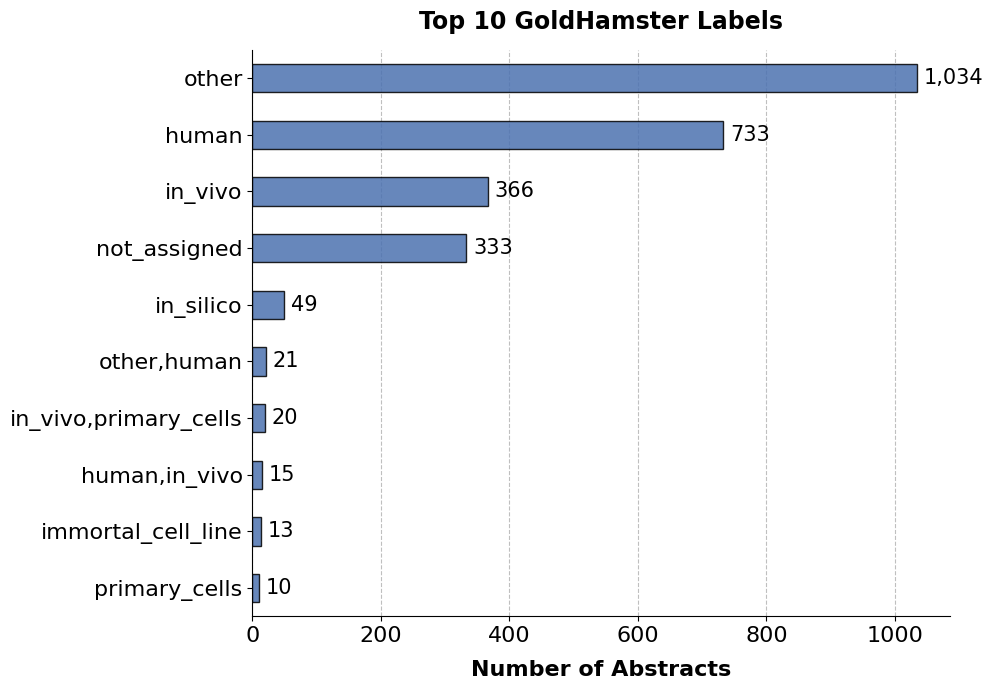

In [381]:
import matplotlib.pyplot as plt

# Get the top 10 labels, sorted by count
labels_count = df_predictions['labels_gs'].value_counts().head(10).sort_values()

# Define figure size and aesthetics
plt.figure(figsize=(10, 7))
ax = labels_count.plot(kind='barh', color='#4c72b0', edgecolor='black', alpha=0.85, zorder=2)

# Titles and labels with improved styling
plt.xlabel('Number of Abstracts', fontsize=16, fontweight='bold', labelpad=10)
plt.ylabel('', fontsize=14, fontweight='bold', labelpad=10)
plt.title('Top 10 GoldHamster Labels', fontsize=17, fontweight='bold', pad=15)

# Improve tick label readability
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)

# Add count labels inside the bars for a cleaner look
for i, count in enumerate(labels_count):
    ax.text(count + (max(labels_count) * 0.01), i, f'{count:,}', va='center', fontsize=15, color='black')

# Add grid lines only on x-axis with subtle styling
ax.grid(axis='x', linestyle='--', alpha=0.5, color='gray', zorder=0)

# Remove top and right spines for a modern look
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig(f"./viz/study_type_teller/goldhamster_label_count_{len(df_predictions)}.pdf")
plt.show()


# Merge with STT

In [384]:
# List of file paths
file_paths = ["data/study_type_teller/test.csv", "data/study_type_teller/train.csv", "data/study_type_teller/val.csv"]  # Replace with actual file names

# Read and concatenate all files
df_list = [pd.read_csv(file) for file in file_paths]
df_stt = pd.concat(df_list, ignore_index=True)
df_stt.head()

,idx,pmid,journal_name,title,abstract,accepted_label,multi_label,binary_label
0,1,12047012,Schizophrenia bulletin,Can clinical practice guide a research agenda?,Articles from this issue of the Bulletin indic...,Non-systematic-review,1,0
1,2,28832188,Future medicinal chemistry,Dual/multitargeted xanthone derivatives for Al...,"To date, the current therapy for Alzheimer's d...",Non-systematic-review,1,0
2,3,17678496,Expert review of neurotherapeutics,Benefits of occupational therapy in stroke reh...,Stroke is the largest single cause of severe p...,Non-systematic-review,1,0
3,4,25649308,Annals of the New York Academy of Sciences,The promise of ketamine for treatment-resistan...,Major depressive disorder (MDD) is one of the ...,Non-systematic-review,1,0
4,5,6312596,La semaine des hopitaux : organe fonde par l'A...,[Clinical and pathogenic aspects of secondary ...,The secondary hyperlipoproteinemias are freque...,Non-systematic-review,1,0


In [339]:
df_stt[df_stt['pmid']=='25833032']

,idx,pmid,journal_name,title,abstract,accepted_label,multi_label,binary_label
932,399,25833032,"Alcoholism, clinical and experimental research",Cognitive impairment following consumption of ...,The aim of this study was to assess the relati...,Remaining,0,0


In [341]:
df_merged = pd.merge(df_stt, df_predictions, on="pmid", how="left")
df_merged

,idx,pmid,journal_name,title,abstract,accepted_label,multi_label,binary_label,labels_gs
0,1,12047012,Schizophrenia bulletin,Can clinical practice guide a research agenda?,Articles from this issue of the Bulletin indic...,Non-systematic-review,1,0,other
1,2,28832188,Future medicinal chemistry,Dual/multitargeted xanthone derivatives for Al...,"To date, the current therapy for Alzheimer's d...",Non-systematic-review,1,0,not_assigned
2,3,17678496,Expert review of neurotherapeutics,Benefits of occupational therapy in stroke reh...,Stroke is the largest single cause of severe p...,Non-systematic-review,1,0,not_assigned
3,4,25649308,Annals of the New York Academy of Sciences,The promise of ketamine for treatment-resistan...,Major depressive disorder (MDD) is one of the ...,Non-systematic-review,1,0,not_assigned
4,5,6312596,La semaine des hopitaux : organe fonde par l'A...,[Clinical and pathogenic aspects of secondary ...,The secondary hyperlipoproteinemias are freque...,Non-systematic-review,1,0,not_assigned
...,...,...,...,...,...,...,...,...,...
2640,526,rayyan-1277757078,Neurology,Evolution of clinical features in possible DLB...,OBJECTIVE: To test the hypothesis that core an...,Human-RCT-non-intervention,13,0,human
2641,527,rayyan-1277751893,Eur Psychiatry,Personality abnormality in severe mental illne...,One hundred fifty-five (77%) of 201 participan...,Human-RCT-non-intervention,13,0,human
2642,528,36472596,Jama,Effect of Timing by Endometrial Receptivity Te...,IMPORTANCE: Endometrial receptivity testing is...,Human-RCT-non-intervention,13,0,other
2643,529,36632763,Neuropsychopharmacol Rep,A diagnostic test to examine early improvement...,INTRODUCTION: Kato et al. reported results of ...,Human-RCT-non-intervention,13,0,human


## evaluate GS binary

In [344]:
from confidenceinterval_local.confidenceinterval.classification_report import classification_report_with_ci
from confidenceinterval.bootstrap import bootstrap_ci

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn

from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, balanced_accuracy_score, classification_report

In [346]:
label_to_numerical = {
    'Rest': 0,
    'Animal': 1
}

numerical_to_label = {v: f"{k}" for k, v in label_to_numerical.items()}
numerical_to_label

{0: 'Rest', 1: 'Animal'}

In [348]:
df_test_set = pd.read_csv("data/study_type_teller/test.csv")
pmid_list = list(df_test_set['pmid'])

In [350]:
df_merged_to_eval = df_merged[df_merged["pmid"].isin(pmid_list)][['pmid','accepted_label','binary_label','labels_gs']]
df_merged_to_eval

,pmid,accepted_label,binary_label,labels_gs
0,12047012,Non-systematic-review,0,other
1,28832188,Non-systematic-review,0,not_assigned
2,17678496,Non-systematic-review,0,not_assigned
3,25649308,Non-systematic-review,0,not_assigned
4,6312596,Non-systematic-review,0,not_assigned
...,...,...,...,...
529,rayyan-1277755883,Human-RCT-non-intervention,0,human
530,28063795,Human-RCT-non-intervention,0,not_assigned
531,rayyan-1277759861,Human-RCT-non-intervention,0,not_assigned
532,rayyan-1277752886,Human-RCT-non-intervention,0,human


In [352]:
df_merged_to_eval["labels_gs_binary"] = df_merged_to_eval["labels_gs"].apply(lambda x: 1 if "in_vivo" in x else 0)
df_merged_to_eval

,pmid,accepted_label,binary_label,labels_gs,labels_gs_binary
0,12047012,Non-systematic-review,0,other,0
1,28832188,Non-systematic-review,0,not_assigned,0
2,17678496,Non-systematic-review,0,not_assigned,0
3,25649308,Non-systematic-review,0,not_assigned,0
4,6312596,Non-systematic-review,0,not_assigned,0
...,...,...,...,...,...
529,rayyan-1277755883,Human-RCT-non-intervention,0,human,0
530,28063795,Human-RCT-non-intervention,0,not_assigned,0
531,rayyan-1277759861,Human-RCT-non-intervention,0,not_assigned,0
532,rayyan-1277752886,Human-RCT-non-intervention,0,human,0


In [354]:
def evaluate_predictions_with_ci(model, df, true_col, prediction_col, label_to_numerical, numerical_to_label, digits=3):
    report_dfs = []
    summary_stats = []

    # Extract arrays for evaluation
    y_true = df[true_col].values
    y_pred = df[prediction_col].values
    cm = confusion_matrix(y_true, y_pred, labels=range(len(label_to_numerical)))
    
    # Normalize the confusion matrix
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_normalized = np.nan_to_num(cm_normalized)  # Replace NaN with 0
    
    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    accuracy_balanced = balanced_accuracy_score(y_true, y_pred)
    report = classification_report_with_ci(y_true, y_pred, numerical_to_label_map=numerical_to_label, round_ndigits=digits)
    
    # Create DataFrame from report
    report_df = pd.DataFrame(report)
    report_dfs.append(report_df)
    
    # Extract summary statistics
    report_df.set_index('class', inplace=True)
    #summary = report_df.loc['weighted avg', ['precision', 'precision CI', 'recall', 'recall CI', 'f1-score', 'f1-score CI', 'accuracy', 'accuracy CI']].to_dict()
    #summary_stats.append(summary)

    # Plotting normalized confusion matrix
    plt.figure(figsize=(12, 7.5))
    ax = sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Greens', xticklabels=range(len(label_to_numerical)), yticklabels=range(len(label_to_numerical)))
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=13)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=13)
    plt.title(f'{model}', fontsize=14)
    plt.xlabel('Predicted', fontsize=13)
    plt.ylabel('True', fontsize=13)

    # Add an inset with label mapping
    textstr = '\n'.join([f'{v}: {k}' for k, v in label_to_numerical.items()])
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.3)
    ax.text(1.16, 1.0, textstr, transform=ax.transAxes, fontsize=10, verticalalignment='top', bbox=props)
    plt.tight_layout()
    plt.savefig(f'./{model}.pdf')
    plt.show()

    # Combine all report DataFrames
    all_reports_df = pd.concat(report_dfs)
    # Create a summary table for average precision, recall, and F1-score
    summary_df = pd.DataFrame(summary_stats)

    return all_reports_df, summary_df

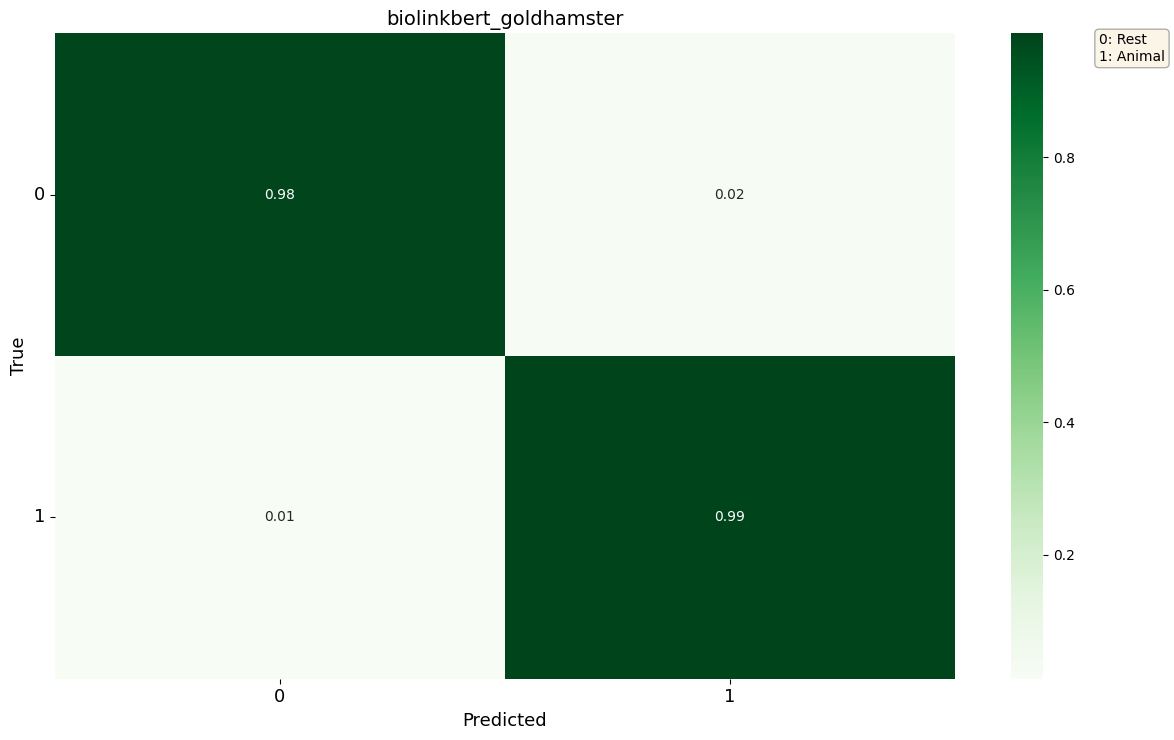

In [356]:
true_col = 'binary_label'
prediction_col = 'labels_gs_binary'
model = 'biolinkbert_goldhamster'
all_reports_df, summary_df = evaluate_predictions_with_ci(model, df_merged_to_eval, true_col, prediction_col, label_to_numerical, numerical_to_label, digits=3)

In [357]:
all_reports_df

,precision,recall,f1-score,accuracy,precision CI,recall CI,f1-score CI,accuracy CI,support
class,,,,,,,,,
Rest,0.998,0.980,0.989,0.981,"(0.987, 1.0)","(0.963, 0.99)","(0.978, 1.0)","(0.966, 0.99)",457
Animal,0.894,0.987,0.938,0.981,"(0.811, 0.943)","(0.93, 0.998)","(0.896, 0.98)","(0.966, 0.99)",77
micro,0.981,0.981,0.981,NaN,"(0.97, 0.993)","(0.97, 0.993)","(0.97, 0.993)",NaN,534
macro,0.946,0.984,0.964,NaN,"(0.914, 0.977)","(0.964, 1.004)","(0.902, 1.025)",NaN,534
weighted avg,0.983,0.981,0.982,0.981,"(0.971, 0.991)","(0.966, 0.991)","(0.967, 0.991)","(0.966, 0.991)",534
accuracy,0.981,0.981,0.981,0.981,"(0.966, 0.991)","(0.966, 0.991)","(0.966, 0.991)","(0.966, 0.991)",534


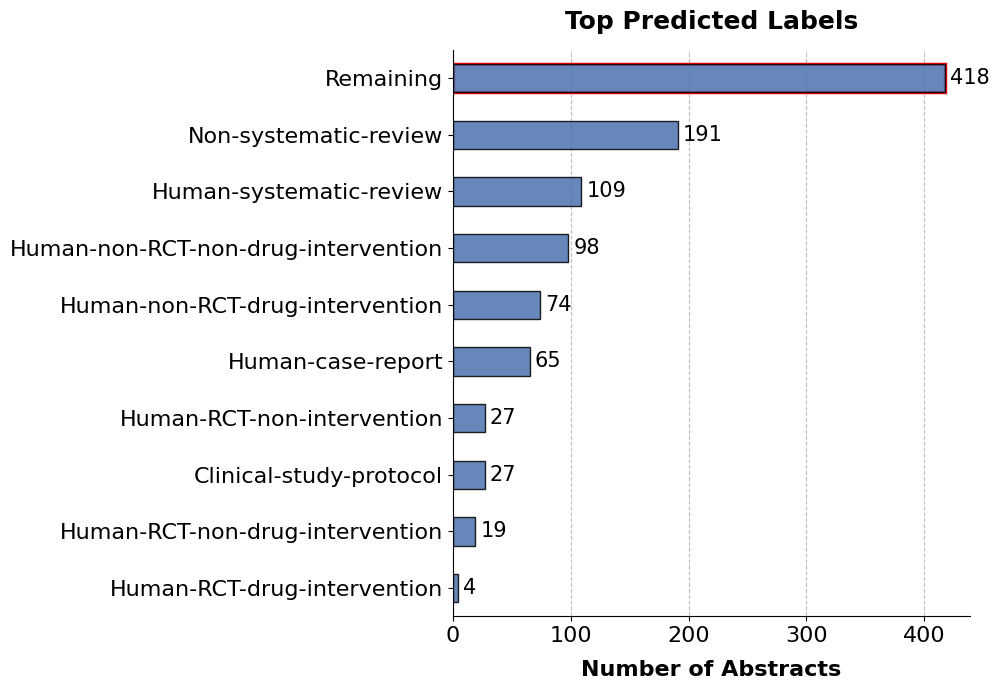

In [390]:
df_predictions_gs_invivo = df_merged[df_merged['labels_gs'] == "other"]
plot_top_labels(df_predictions_gs_invivo, 'accepted_label', highlight_label='Remaining')

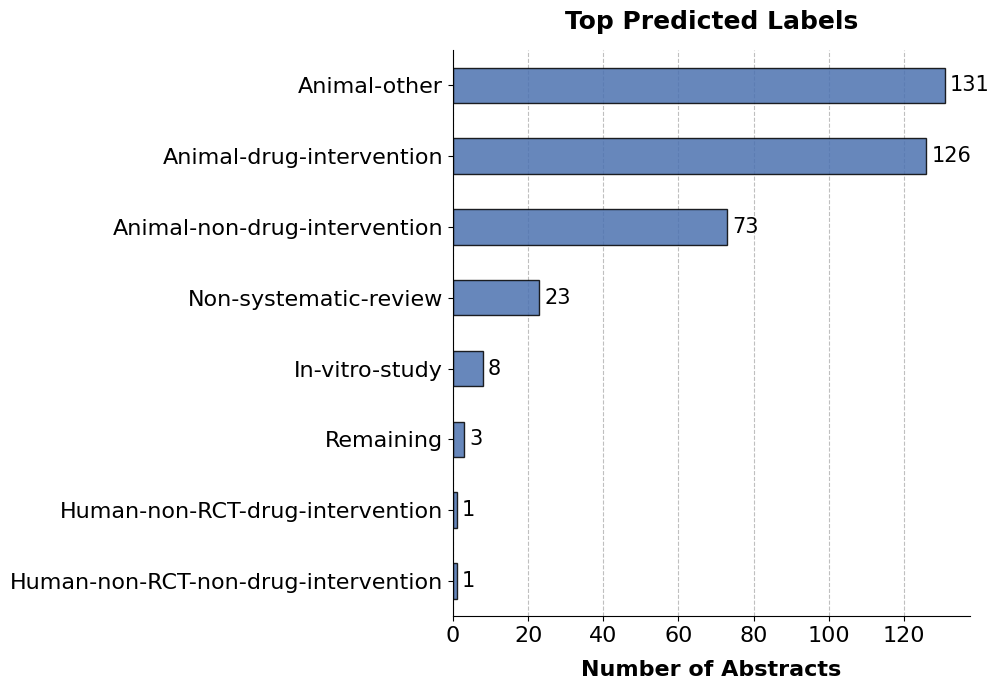

In [359]:
df_predictions_gs_invivo = df_merged[df_merged['labels_gs'] == "in_vivo"]
plot_top_labels(df_predictions_gs_invivo, 'accepted_label')

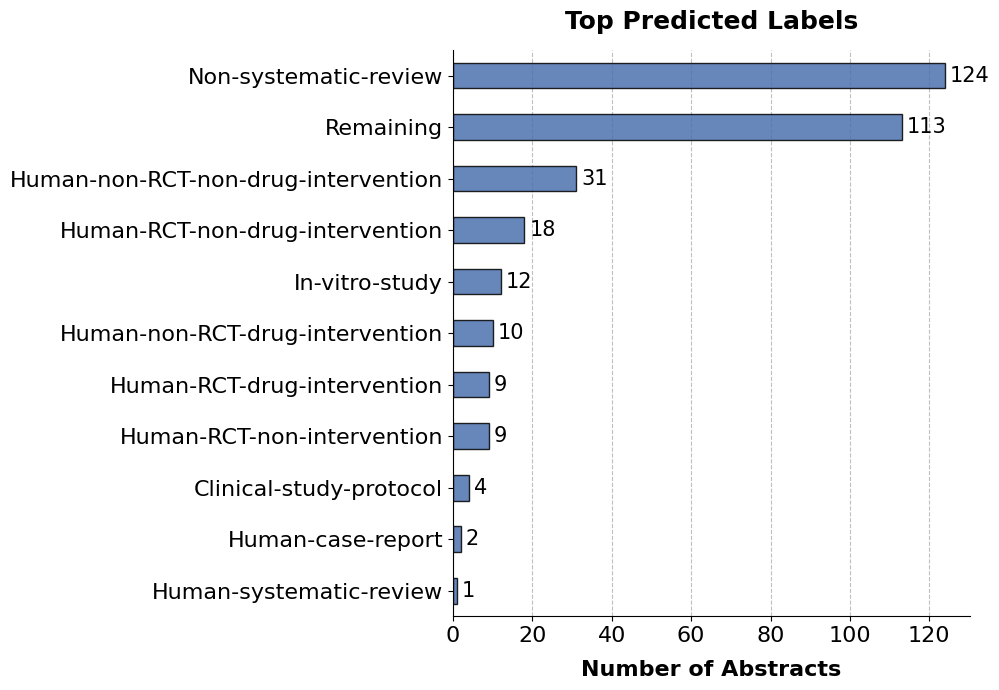

In [333]:
df_predictions_gs_invivo = df_merged[df_merged['labels_gs'] == "not_assigned"]
plot_top_labels(df_predictions_gs_invivo, 'accepted_label')

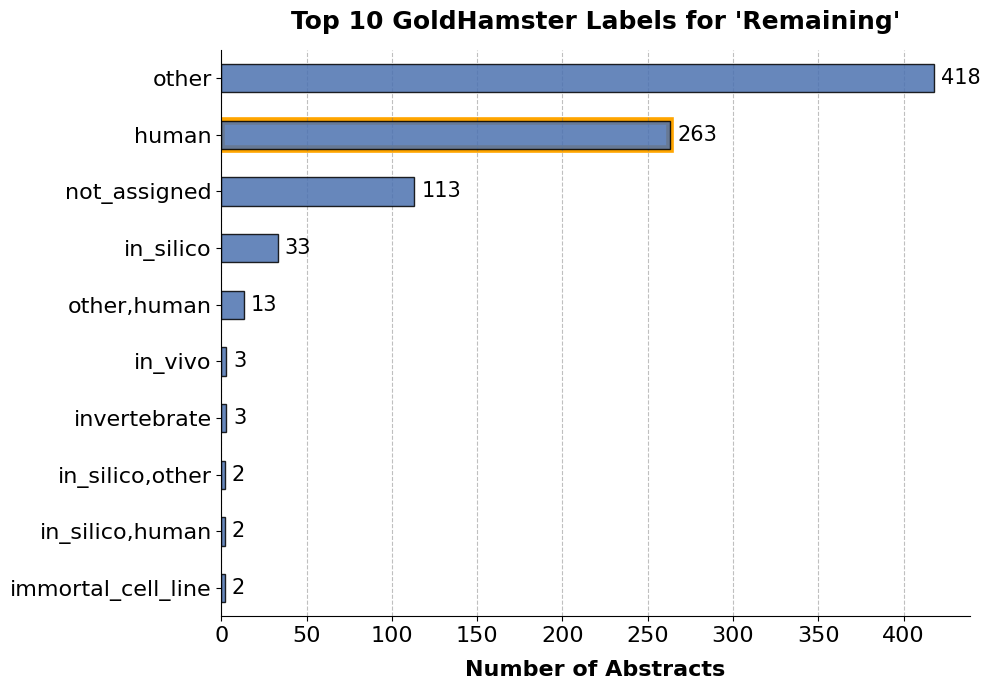

In [400]:
df_predictions_stt = df_merged[df_merged['accepted_label'] == "Remaining"]
plot_top_labels(df_predictions_stt, 'labels_gs', title="Top 10 GoldHamster Labels for 'Remaining'", highlight_label='human', save=True)

In [235]:
df_predictions_stt = df_merged[df_merged['accepted_label'] == "Remaining"]
df_predictions_stt_remaining_human = df_predictions_stt[df_predictions_stt['labels_gs']=="human"]
df_predictions_stt_remaining_human

,idx,pmid,journal_name,title,abstract,accepted_label,multi_label,binary_label,labels_gs
94,95,3206055,Sleep,The effect of total sleep deprivation on plasm...,Twelve healthy volunteers were included in thi...,Remaining,0,0,human
96,97,19728219,Journal of psychosomatic obstetrics and gynaec...,Lifetime physical and sexual abuse and the ris...,Despite the growing body of evidence on the si...,Remaining,0,0,human
99,100,11904752,Acta neuropathologica,Vascular fibrosis and calcification in the hip...,Study of the hippocampal formation of 82 subje...,Remaining,0,0,human
109,110,28627925,Experimental and clinical psychopharmacology,Will delay discounting predict intention to qu...,Intention to quit cigarette smoking is signifi...,Remaining,0,0,human
112,113,8264869,Neuroendocrinology,Alpha-melanocyte-stimulating hormone is presen...,"Plasma ACTH, beta-endorphin and alpha-melanocy...",Remaining,0,0,human
...,...,...,...,...,...,...,...,...,...
2367,253,16319418,Journal of lipid research,Increased sphingomyelin content impairs HDL bi...,We previously reported that human Niemann-Pick...,Remaining,0,0,human
2368,254,14872042,Neurology,Reversible leukoencephalopathy associated with...,The authors describe three patients with rever...,Remaining,0,0,human
2369,255,25947039,Neuropsychological rehabilitation,Cognitive complaints in cancer: The French ver...,Cancer patients often report cognitive changes...,Remaining,0,0,human
2372,258,29554099,PLoS computational biology,The Pathway Coexpression Network: Revealing pa...,A goal of genomics is to understand the relati...,Remaining,0,0,human


In [236]:
df_predictions_stt_remaining_human.to_csv("data/multi_tagger/stt_data_remaining_gs_human.csv")

In [237]:
# Filter rows where `accepted_label` is "Remaining"
df_remaining = df_merged[df_merged["accepted_label"] == "Remaining"]

# Randomly sample 50 rows (without replacement)
df_sampled = df_remaining.sample(n=50, random_state=42)

df_sampled.head()

,idx,pmid,journal_name,title,abstract,accepted_label,multi_label,binary_label,labels_gs
2234,120,34523706,Tijdschrift voor psychiatrie,"[Parental support, parental self-efficacy and ...",Parenting an adolescent with borderline person...,Remaining,0,0,human
1240,707,31507272,Medical science monitor : international medica...,Clustering of Mental and Physical Comorbidity ...,BACKGROUND This study aimed to identify the cl...,Remaining,0,0,other
213,214,27527755,European journal of internal medicine,Blood cultures in the evaluation of uncomplica...,The frequency of bacteremia and the array of m...,Remaining,0,0,other
844,311,34775687,Brain and behavior,Migraine headache in Sudan.,"Migraine is a main form of headache, it is als...",Remaining,0,0,other
1016,483,16603460,Substance use & misuse,Reliability testing and validation of the drug...,This study was designed to provide reliability...,Remaining,0,0,human


In [238]:
df_sampled['pmid'].to_csv("data/study_type_teller/random_50_remaining_class.txt", index=False, header=False)

### inspect publication type of articles in "remaining" (sample 50)

In [240]:
def read_df_from_txt(input_file_path, headers, separator):

    # Read and process the file manually to handle the multi-character delimiter
    data = []
    with open(input_file_path, 'r', encoding='utf-8') as file:
        for line in file:
            # Split each line using the delimiter and add to the list
            fields = line.strip().split(separator)
            if len(fields) == len(headers):  # Ensure the correct number of fields
                data.append(fields)

    # Convert the processed data into a DataFrame
    new_data = pd.DataFrame(data, columns=headers)
    return new_data

In [241]:
headers = ["PMID", "year", "journal_name", "title", "abstract", "publication_type"]
separator = "|||"
df = read_df_from_txt("data/study_type_teller/pubmed_details_50.txt", headers, separator)

In [406]:
df.head()

,PMID,year,journal_name,title,abstract,publication_type
0,26201,1978,Acta virologica,Transmissible virus dementia. II. Neurohistolo...,Histopathological findings in three temporo-sp...,Case Reports+Journal Article
1,1052765,1975,Annals of human genetics,Observation on the familial appearance of dise...,The familial appearnace of diseases in which a...,Journal Article
2,1973218,1990,"Lancet (London, England)",Apomorphine test to predict dopaminergic respo...,To evaluate apomorphine as an indicator of dop...,"Journal Article+Research Support, Non-U.S. Gov..."
3,2791758,1989,Zhonghua shen jing jing shen ke za zhi = Chine...,[A further study and discussion on mirror writ...,Mirror image writing was done in 72 preschool ...,English Abstract+Journal Article
4,3226364,1988,Medical hypotheses,The TILT formula for brain lesions.,A formula to evaluate and grade brain lesions ...,"Journal Article+Research Support, Non-U.S. Gov't"


In [243]:
df['publication_type'].value_counts().sort_values()

publication_type
Journal Article+Randomized Controlled Trial+Research Support, Non-U.S. Gov't                                                                                            1
English Abstract+Journal Article                                                                                                                                        1
Journal Article+Research Support, U.S. Gov't, P.H.S.                                                                                                                    1
Comparative Study+English Abstract+Journal Article                                                                                                                      1
Comparative Study+Journal Article+Research Support, Non-U.S. Gov't+Research Support, U.S. Gov't, P.H.S.                                                                 1
Journal Article+Research Support, N.I.H., Extramural+Research Support, Non-U.S. Gov't+Research Support, U.S. Gov't, Non-P.H.S.+Resear